In [1]:
# Applied Machine Learning (HOUSECS 59-03)
# Fall 2018, Duke University
# Support Vector Machines

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import accuracy_score, confusion_matrix

Let's begin by exploring the dataset from the previous lecture that looks at irises, a type of flower: load the data into a Pandas dataframe. Take a look at the different features (sepal length, sepal width, petal length, and petal width) and classes (Setosa, Versicolour, and Virginica).

In [3]:
# load dataset
iris = datasets.load_iris()
print(iris["DESCR"])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["flower"] = iris.target
df = df.sample(frac=1).reset_index(drop=True) # shuffle rows
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                4.8               3.1                1.6               0.2   
1                4.6               3.4                1.4               0.3   
2                7.7               3.0                6.1               2.3   
3                5.7               2.8                4.1               1.3   
4                5.7               3.8                1.7               0.3   

   flower  
0       0  
1       0  
2       2  
3       1  
4       0

We can also visualize the data by plotting "clusters" of the same flower type over two features: in this case, sepal length and sepal width. Notice how flower 0 is nicely separated from the other two flowers based on these two features; however, the other two flowers are not separated just based on these two features.

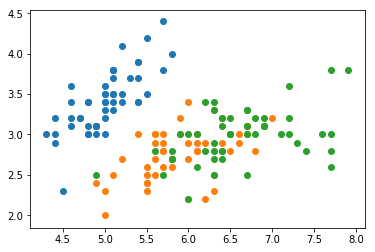

In [5]:
# plot clusters based on sepal length and sepal width
plt.scatter(df[df["flower"] == 0]["sepal length (cm)"], df[df["flower"] == 0]["sepal width (cm)"])
plt.scatter(df[df["flower"] == 1]["sepal length (cm)"], df[df["flower"] == 1]["sepal width (cm)"])
plt.scatter(df[df["flower"] == 2]["sepal length (cm)"], df[df["flower"] == 2]["sepal width (cm)"])

---
We can create a support vector machine (SVM) classification model that takes all four features (sepal length, sepal width, petal length, and petal width) as input to predict the flower type (Setosa, Versicolour, or Virginica). We can use the first 120 points as training, and test on the remaining 30 (notice how we shuffled the data earlier).

Notice how the default kernel is the RBF kernel (take a look at the output below, which specifies the parameters used in the SVM model). The parameter gamma specifies the hyperparameter $\gamma > 0$ used in the RBF kernel; the default value of gamma is 'auto', which is 1/(# features).

In [6]:
# create and fit model
svm_model = svm.SVC(probability=True)
svm_model.fit(df.loc[:119, iris.feature_names], df.loc[:119, "flower"])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# predict model
svm_pred = svm_model.predict(df.loc[120:, iris.feature_names])
print("accuracy", accuracy_score(df.loc[120:, "flower"], svm_pred))
print("misclassification error", 1-accuracy_score(df.loc[120:, "flower"], svm_pred))

accuracy 1.0
misclassification error 0.0


From the testing set, we can calculate the accuracy and misclassification error. We can also compute a confusion matrix, which provides a concise presentation of the predictive power of the model.

In [8]:
conf_matrix = confusion_matrix(df.loc[120:, "flower"], svm_pred)
print("confusion matrix")
print(conf_matrix)

confusion matrix
[[ 9  0  0]
 [ 0  7  0]
 [ 0  0 14]]


Notice how we're able to perfectly classify the data points in the testing set using an RBF kernel for this particular value of hyperparameter $\gamma$. Let's now try modifying the value of $\gamma$: recall how a large value of $\gamma$ is likely to overfit the training data. Take a look at how the SVM model does over a range of values of $\gamma$. The default value, recall, is 0.25, or 1/(# features).

In [9]:
gammas = [0.01, 0.0333, 0.1, 0.333, 1, 3.33, 10, 33.3, 100]

for gamma in gammas:
    # create and fit model
    svm_model = svm.SVC(probability=True, gamma=gamma)
    svm_model.fit(df.loc[:119, iris.feature_names], df.loc[:119, "flower"])

    # predict model
    svm_pred = svm_model.predict(df.loc[120:, iris.feature_names])
    print("gamma", gamma, "\taccuracy", accuracy_score(df.loc[120:, "flower"], svm_pred))

gamma 0.01 	accuracy 0.9333333333333333
gamma 0.0333 	accuracy 1.0
gamma 0.1 	accuracy 1.0
gamma 0.333 	accuracy 1.0
gamma 1 	accuracy 1.0
gamma 3.33 	accuracy 0.9666666666666667
gamma 10 	accuracy 0.9666666666666667
gamma 33.3 	accuracy 0.7666666666666667
gamma 100 	accuracy 0.36666666666666664


---
Let's now try using a linear kernel instead. We can specify the kernel to use in scikit-learn.

In [10]:
# create and fit model
svm_model = svm.SVC(probability=True, kernel="linear")
svm_model.fit(df.loc[:119, iris.feature_names], df.loc[:119, "flower"])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# predict model
svm_pred = svm_model.predict(df.loc[120:, iris.feature_names])
print("accuracy", accuracy_score(df.loc[120:, "flower"], svm_pred))
print("misclassification error", 1-accuracy_score(df.loc[120:, "flower"], svm_pred))

accuracy 1.0
misclassification error 0.0


Notice how the linear kernel does a perfect job! Recall how simpler models are preferred to more complex models, given the same performance; hence, an RBF kernel may be unnecessary.

We can also try using different polynomial kernels. Recall how polynomial kernels have two hyperparameters: a bias coefficient $c$ and degree $d$. The default values of $c$ and $d$ are 0.0 and 3, respectively. We'll keep $c$ fixed at 0.0 for now, but experiment over a few different values of $d$.

In [12]:
degrees = range(1, 6)

for degree in degrees:
    # create and fit model
    svm_model = svm.SVC(probability=True, kernel="poly", degree=degree, gamma=1)
    svm_model.fit(df.loc[:119, iris.feature_names], df.loc[:119, "flower"])

    # predict model
    svm_pred = svm_model.predict(df.loc[120:, iris.feature_names])
    print("degree", degree, "\taccuracy", accuracy_score(df.loc[120:, "flower"], svm_pred))

degree 1 	accuracy 1.0
degree 2 	accuracy 1.0
degree 3 	accuracy 1.0
degree 4 	accuracy 0.9666666666666667
degree 5 	accuracy 0.9666666666666667


Second-degree and third-degree polynomial kernels classify the data in the testing set perfectly, but fourth-degree and higher polynomial kernels begin to (slightly) overfit!

Take a few moments to discuss with a neighbor which kernel (and hyperparameters, if any) you would use, and why.